In [1]:
import itertools as it
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools as it
from collections import defaultdict
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
path_common_source_trans = '/home/user/Desktop/courseProject/data/train_transaction.csv'
path_common_source_idn = '/home/user/Desktop/courseProject/data/train_identity.csv'
path_to_data_folder = '/home/user/Desktop/courseProject/data/'

In [3]:
clear_data = pd.read_csv(path_to_data_folder + '/clear_and_filled.csv')

In [4]:
clear_data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_20', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=218)

In [5]:
# encoding sources
cat_dum = ['card4', 'card6','ProductCD', 'P_emaildomain', 'R_emaildomain', 'M1', 
           'M2', 'M3', 'M4','M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37'
          , 'id_38', 'DeviceType']
mean_dum = ['id_31', 'DeviceInfo', 'card1', 'card2',  'card3', 'card5', 'addr1', 'addr2']

def get_mean_encoding(df, group, target):
    """Group a Pandas DataFrame by a given column and return the mean encoding of the target variable for that grouping.
    
    Args:
        :param df: Pandas DataFrame.
        :param group: Column to group by. 
        :param target: Target variable column.
        
    Returns:
        Mean for the target variable across the group.
    
    Example: 
        df['mean_encoding_postcode_area'] = get_mean_encoding(df, 'postcode_area', 'attended')
    """
    
    mean_encoded = df.groupby(group)[target].mean()
    return df[group].map(mean_encoded)

In [13]:
#y = clear_data['isFraud']
X = clear_data #.drop('isFraud', axis=1)


# code One Hot Encoding only cat_dum - cols
X = pd.get_dummies(X, drop_first=True, columns=cat_dum)
X_red_mean = X.copy()
X_red_mean.drop(columns=mean_dum)
for col in mean_dum:
    t = get_mean_encoding(X, col, 'isFraud')
    X_red_mean[t.name] = t.values
X = X_red_mean.copy()
ALL = X.copy()
ALL.to_csv(path_to_data_folder + '/clear_and_encoded.csv', index=False)
y = X['isFraud']
X = X.drop('isFraud', axis=1)
# !!! attention
X = X.drop('TransactionID', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=123)

### Обучение модели и оценка качества

In [7]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
print(r2_score(ytest, model.predict(Xtest)))
print(r2_score(ytrain, model.predict(Xtrain)))

0.6563593938314705
0.6701958852556307


In [8]:
model_l2 = Ridge(alpha=1)
model_l2.fit(Xtrain, ytrain)
print(r2_score(ytest, model_l2.predict(Xtest)))
print(r2_score(ytrain, model_l2.predict(Xtrain)))

/home/user/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.3467e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.6563794468096953
0.6701916080725311


In [9]:
lr_mse = SGDRegressor(loss='squared_loss')
lr_mse.fit(Xtrain, ytrain)
print(r2_score(ytest,lr_mse.predict(Xtest)))
print(r2_score(ytrain,lr_mse.predict(Xtrain)))

/home/user/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


-2.10873963688887e+44
-2.0501756595121098e+44


In [10]:
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0)
lr_mae.fit(Xtrain, ytrain)
print(r2_score(ytest, lr_mae.predict(Xtest)))
print(r2_score(ytrain, lr_mae.predict(Xtrain)))

-1.5713495469033033e+20


/home/user/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


NameError: name 'r_mae' is not defined

In [15]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xtrain, ytrain)
r2_score(ytest, logreg.predict(Xtest))
r2_score(ytrain, logreg.predict(Xtrain))

-0.04273204597876812

In [14]:
X.columns

Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
       'addr1', 'addr2', 'dist1', 'C1',
       ...
       'id_15_New', 'id_15_Unknown', 'id_16_NotFound', 'id_28_New',
       'id_29_NotFound', 'id_35_T', 'id_36_T', 'id_37_T', 'id_38_T',
       'DeviceType_mobile'],
      dtype='object', length=340)

### Correlation

In [ ]:
for col in X.columns:
    t = y.corr(X.loc[:,col])
    if abs(t) > 0.3:
        print(t, col)

In [ ]:
X.corr()

In [21]:
X.shape

(590540, 340)

# Normalize attemp

In [18]:
normalizer = preprocessing.MinMaxScaler()
X_norm = normalizer.fit_transform(X)
X_norm = pd.DataFrame(data=X_norm)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_norm, y, test_size=0.25, random_state=123)

In [19]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_n_train, y_n_train)
r2_score(ytest, logreg.predict(X_n_test))
r2_score(ytrain, logreg.predict(X_n_train))

0.9998672946807535

In [26]:
(logreg.coef_ < 0.05).sum()

229

In [36]:
t = logreg.coef_[0]
#for i in range(len(t)):
#   if t[i]< 0.05:
#        print("h")
print([i for i in range(len(t)) if abs(t[i])< 0.05])

[10, 11, 18, 20, 21, 24, 25, 26, 27, 28, 30, 38, 39, 42, 50, 58, 61, 62, 72, 77, 78, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 93, 96, 97, 98, 99, 100, 102, 110, 117, 123, 125, 127, 128, 129, 130, 132, 135, 136, 142, 143, 155, 156, 157, 159, 161, 170, 171, 173, 175, 179, 180, 197, 202, 205, 206, 207, 208, 209, 212, 213, 214, 215, 216, 219, 221, 225, 228, 232, 233, 234, 237, 240, 241, 242, 245, 246, 247, 248, 251, 252, 253, 256, 257, 258, 263, 264, 265, 266, 267, 269, 270, 271, 272, 273, 277, 278, 279, 283, 286, 287, 289, 291, 293, 295, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 310, 311, 312, 315, 316, 317, 318, 319, 321]


In [37]:
removed_cols = []
for i in range(len(logreg.coef_[0])):
    coef = logreg.coef_[0][i]
    if abs(coef) < 0.05:
        removed_cols.append(X.columns[i])

In [38]:
removed_cols

['C3',
 'C5',
 'D11',
 'V1',
 'V2',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V14',
 'V27',
 'V29',
 'V37',
 'V49',
 'V65',
 'V68',
 'V70',
 'V95',
 'V105',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V123',
 'V129',
 'V130',
 'V131',
 'V135',
 'V136',
 'V170',
 'V181',
 'V191',
 'V205',
 'V208',
 'V210',
 'V214',
 'V215',
 'V217',
 'V221',
 'V226',
 'V227',
 'V240',
 'V241',
 'V264',
 'V267',
 'V268',
 'V274',
 'V282',
 'V291',
 'V300',
 'V305',
 'V311',
 'V319',
 'V320',
 'card6_debit or credit',
 'P_emaildomain_anonymous.com',
 'P_emaildomain_bellsouth.net',
 'P_emaildomain_cableone.net',
 'P_emaildomain_centurylink.net',
 'P_emaildomain_cfl.rr.com',
 'P_emaildomain_charter.net',
 'P_emaildomain_earthlink.net',
 'P_emaildomain_embarqmail.com',
 'P_emaildomain_frontier.com',
 'P_emaildomain_frontiernet.net',
 'P_emaildomain_gmail',
 'P_emaildomain_hotmail.co.uk',
 'P_emaildomain_hotmail.de',
 'P_emaildomain_juno.com',
 'P_emaildoma

(array([  1.,   0.,   0.,   1.,  25., 303.,   7.,   1.,   0.,   2.]),
 array([-14.53939177, -11.72056357,  -8.90173537,  -6.08290717,
         -3.26407897,  -0.44525077,   2.37357743,   5.19240563,
          8.01123384,  10.83006204,  13.64889024]),
 <BarContainer object of 10 artists>)

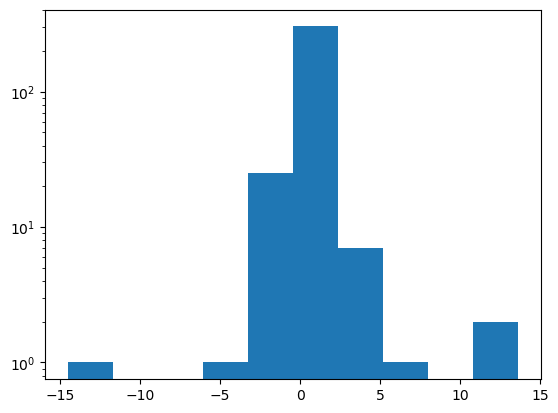

In [54]:
plt.hist(logreg.coef_[0].T, log=True)

<AxesSubplot:ylabel='Count'>

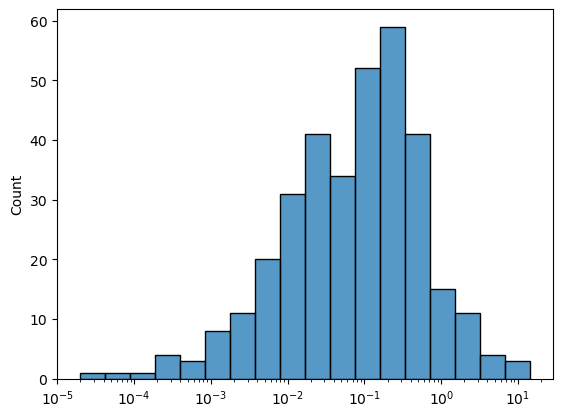

In [48]:
sns.histplot(abs(logreg.coef_[0]), log_scale=True)